In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./chicken_4lb.txt', sep=',', header=None, names=['time','air','meat'])
df['time'] = pd.to_datetime(df['time'],unit='s',utc=True)

<AxesSubplot:xlabel='time'>

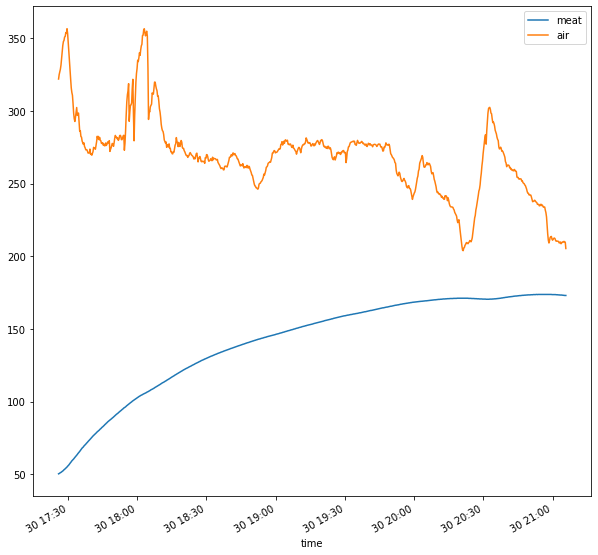

In [3]:
df.plot('time',['meat','air'], figsize=(10,10))

In [4]:
def plot(path):
    df = pd.read_csv(path, sep='|', header=None, names=['time','topic','temps'])
    df['time'] = pd.to_datetime(df['time'],unit='s',utc=True).dt.tz_convert(tz='US/Central')
    df['air'] = df.temps.apply(lambda x: float(x.split(',')[0][2:]))
    df['meat'] = df.temps.apply(lambda x: float(x.split(',')[1][:-1]))
    start_time = df.time.iloc[0]
    end_time = df.time.iloc[-1]
    print(start_time)
    print(end_time)
    print(end_time - start_time)
    df.plot('time',['meat','air'], figsize=(15,10), grid=True)

2020-06-13 10:01:03-05:00
2020-06-13 17:24:04-05:00
0 days 07:23:01


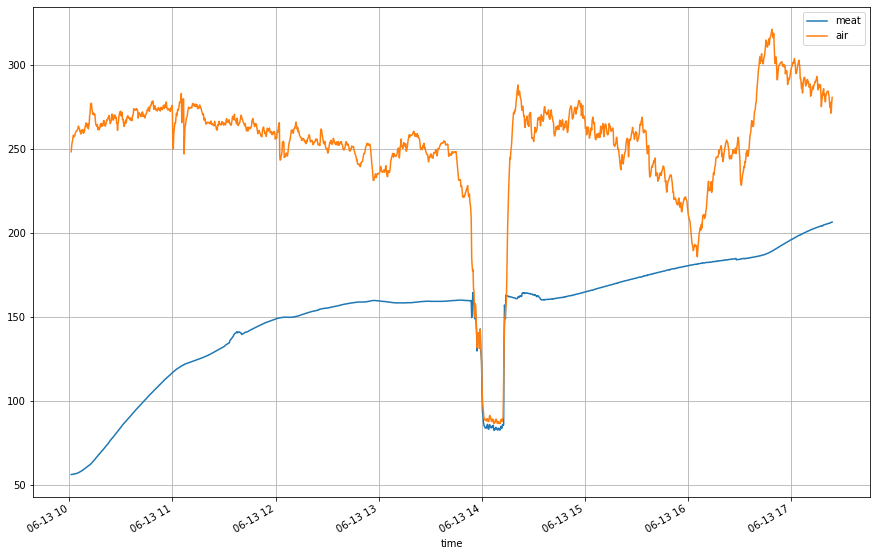

In [5]:
plot('./boston_6lb.txt')

2020-06-28 15:18:02-05:00
2020-06-28 16:51:11-05:00
0 days 01:33:09


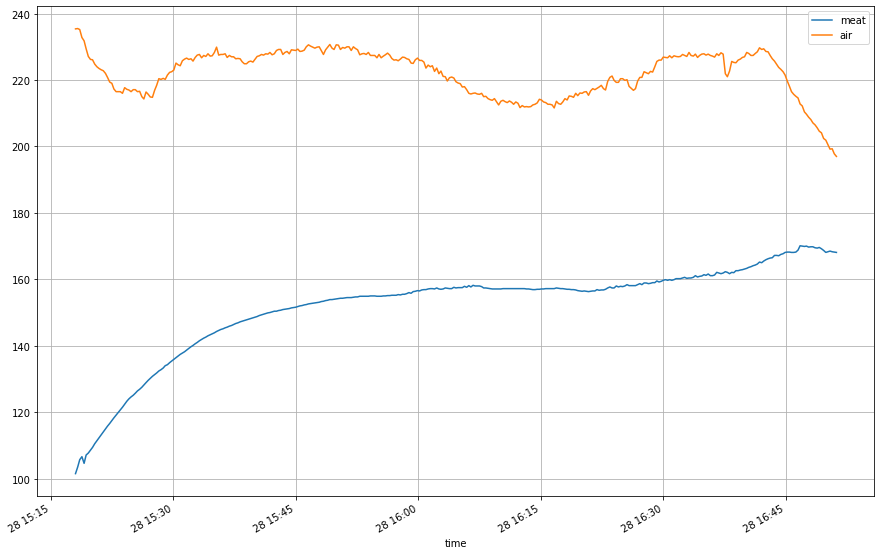

In [6]:
plot('./chicken_new_smoker.txt')

2020-07-02 23:39:56-05:00
2020-07-03 16:07:34-05:00
0 days 16:27:38


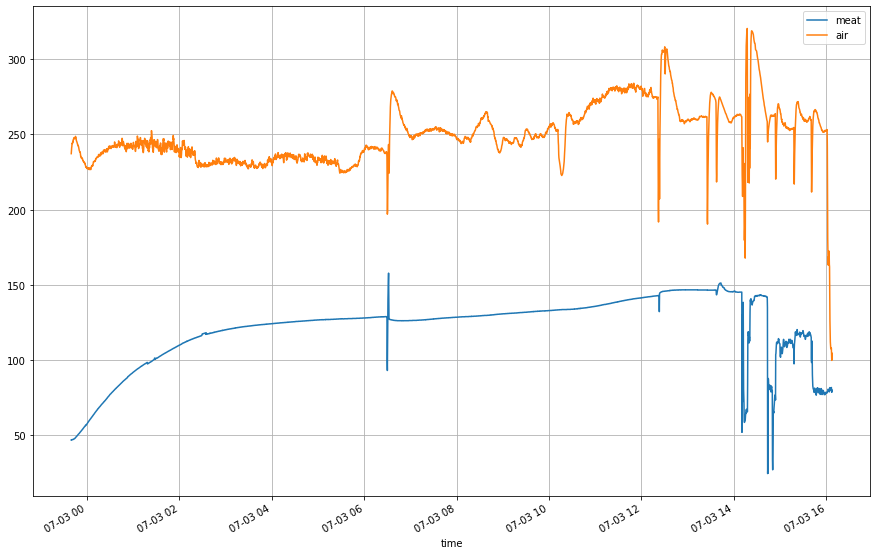

In [7]:
plot('./brisket_10lb.txt')

2020-08-01 07:58:10-05:00
2020-08-01 20:55:20-05:00
0 days 12:57:10


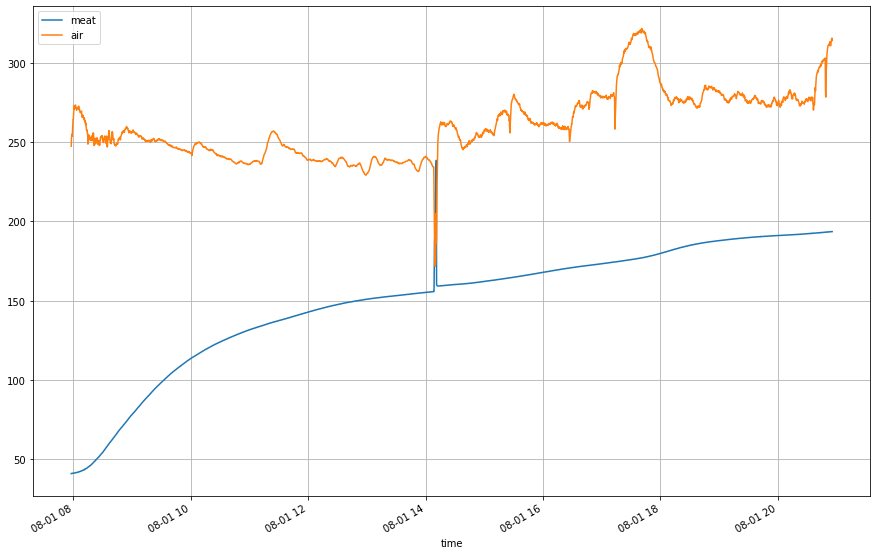

In [8]:
plot('./boston_8lb.txt')

In [9]:
def plotJSON(path):
    df = pd.read_csv(path, sep='|', header=None, names=['time','topic','payload'])
    df['payloadParsed'] = df['payload'].apply(lambda x: json.loads(x[2:-1]))
    df = pd.json_normalize(df['payloadParsed'])
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s',utc=True).dt.tz_convert(tz='US/Central')
    start_time = df.timestamp.iloc[0]
    end_time = df.timestamp.iloc[-1]
    print(start_time)
    print(end_time)
    print(end_time - start_time)
    df.plot('timestamp',['meat','air'], figsize=(15,10), grid=True, yticks=range(40,340,20))

2020-09-04 19:46:17-05:00
2020-09-05 12:40:47-05:00
0 days 16:54:30


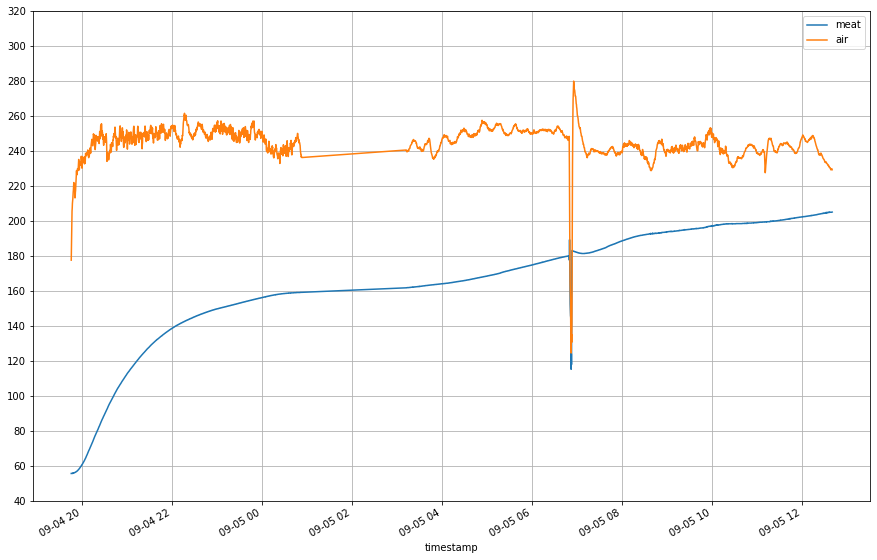

In [10]:
plotJSON('./brisket_14lb.txt')

2020-09-06 07:50:36-05:00
2020-09-06 20:52:13-05:00
0 days 13:01:37


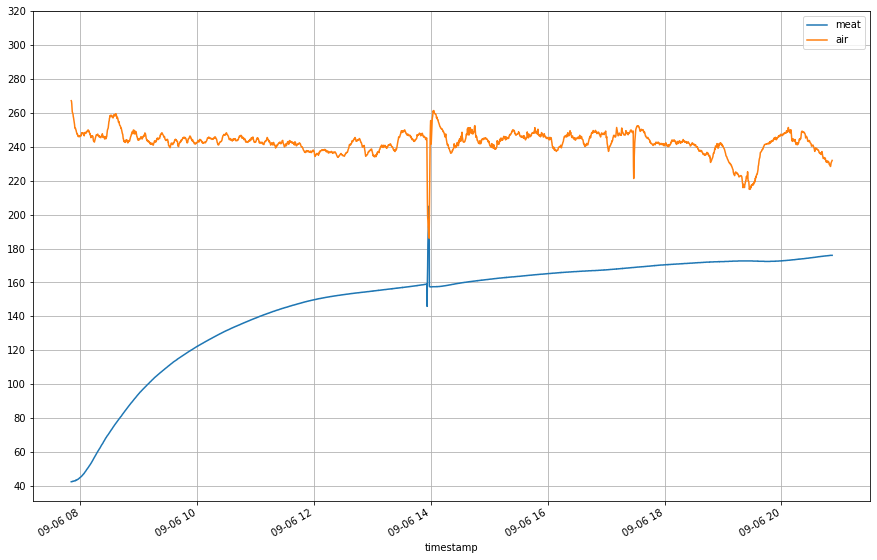

In [11]:
plotJSON('./boston_7_5lb.txt')

2020-09-30 12:51:19-05:00
2020-09-30 19:54:42-05:00
0 days 07:03:23


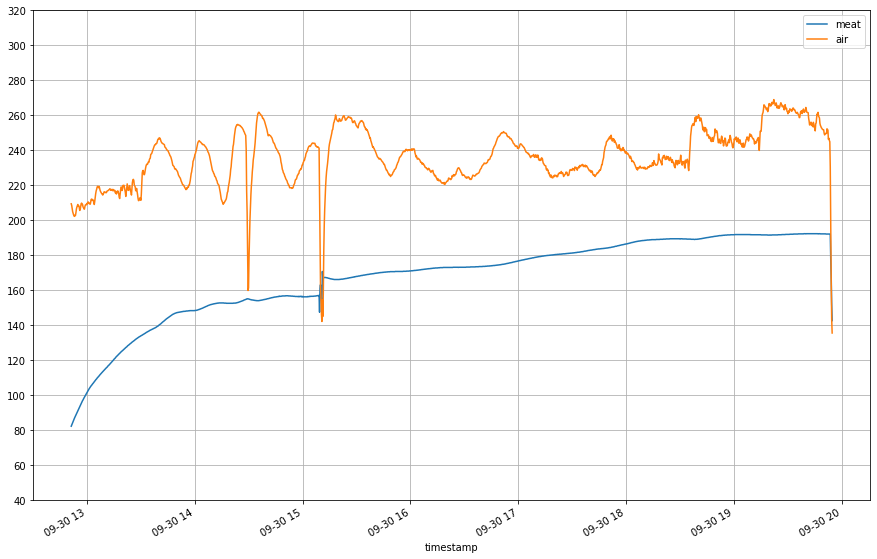

In [12]:
plotJSON('./stl_ribs.txt')

2020-11-06 17:52:26-06:00
2020-11-07 15:41:50-06:00
0 days 21:49:24


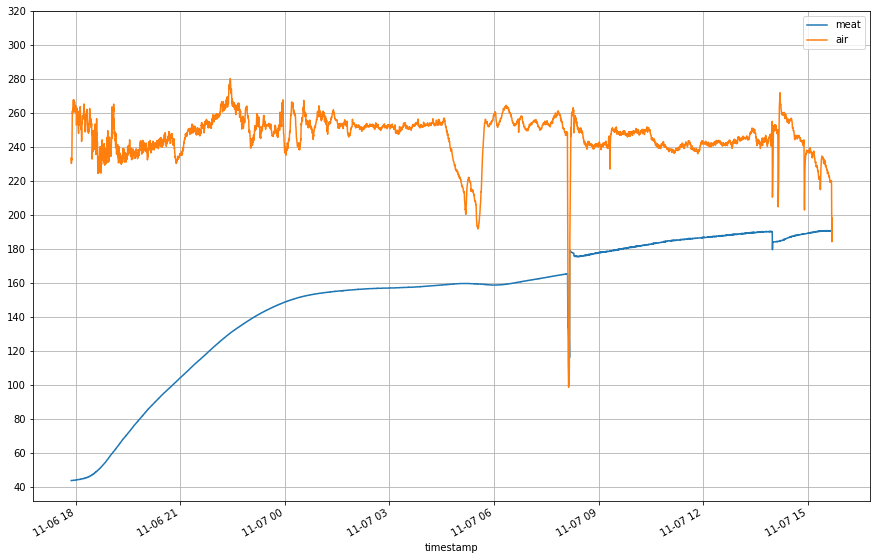

In [13]:
plotJSON('../data/brisket_18lb.txt')

2021-03-07 11:01:45-06:00
2021-03-07 14:17:13-06:00
0 days 03:15:28


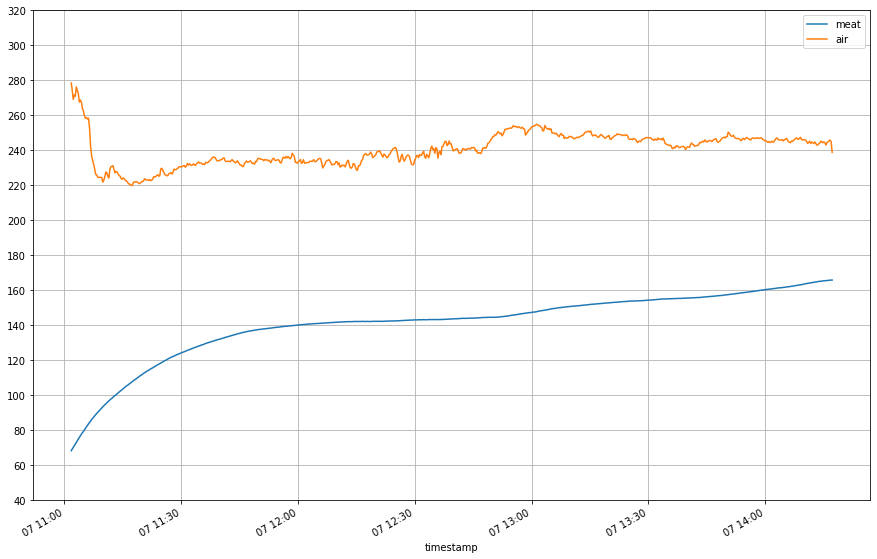

In [14]:
plotJSON('../data/chicken_5lb.txt')

2021-03-21 07:33:35-05:00
2021-03-21 17:01:09-05:00
0 days 09:27:34


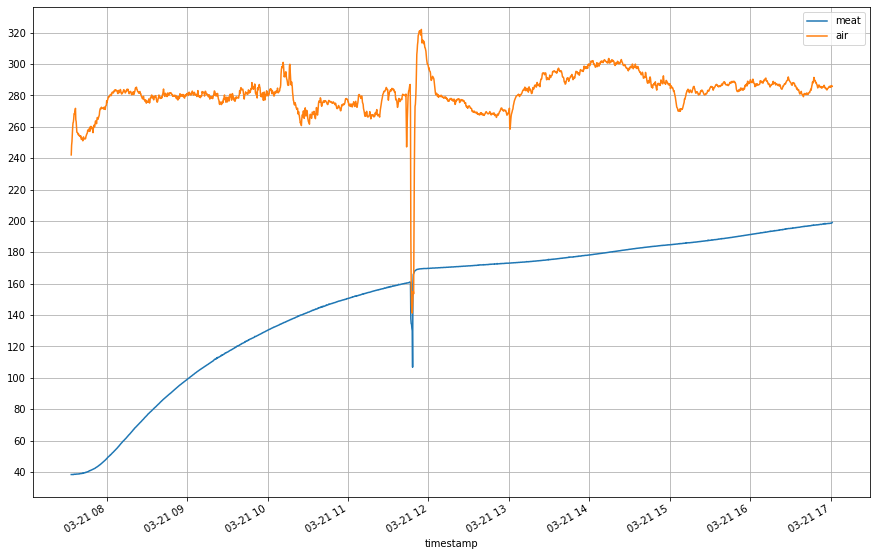

In [15]:
plotJSON('../data/boston_7_4lb.txt')

2021-04-03 21:17:50-05:00
2021-04-04 12:59:36-05:00
0 days 15:41:46


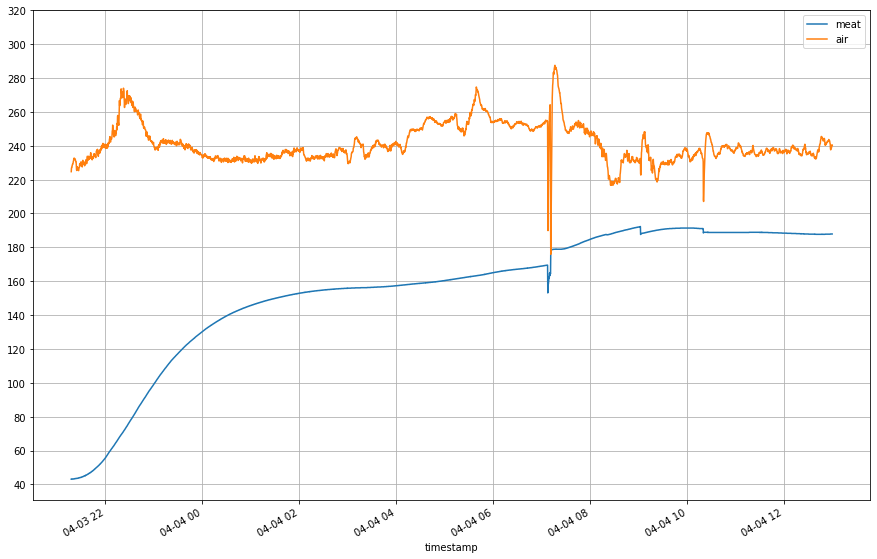

In [16]:
plotJSON('../data/brisket_14_5lb.txt')

2021-05-01 23:11:58-05:00
2021-05-02 14:11:20-05:00
0 days 14:59:22


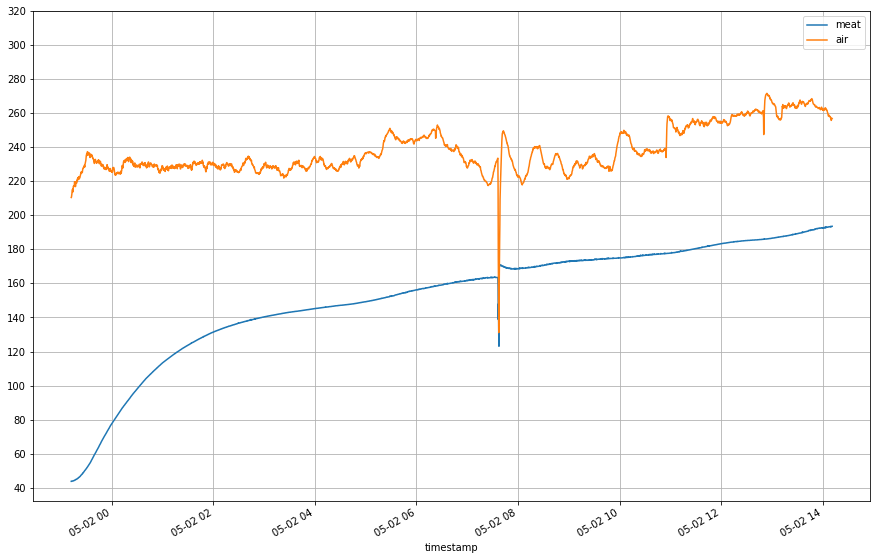

In [17]:
plotJSON('../data/boston_9_lb.txt')

2021-06-06 02:23:42-05:00
2021-06-06 15:23:29-05:00
0 days 12:59:47


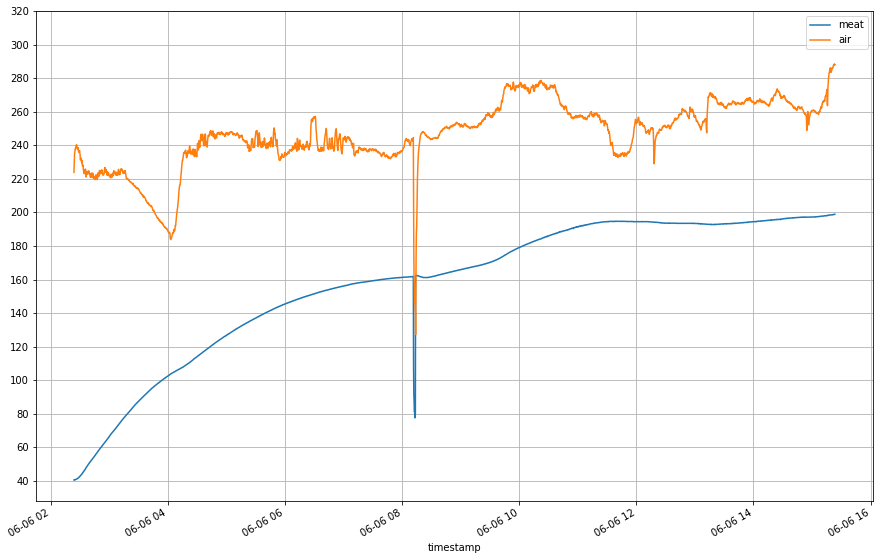

In [18]:
plotJSON('../data/brisket_10lb_2.txt')

2021-06-27 08:39:09-05:00
2021-06-27 15:57:27-05:00
0 days 07:18:18


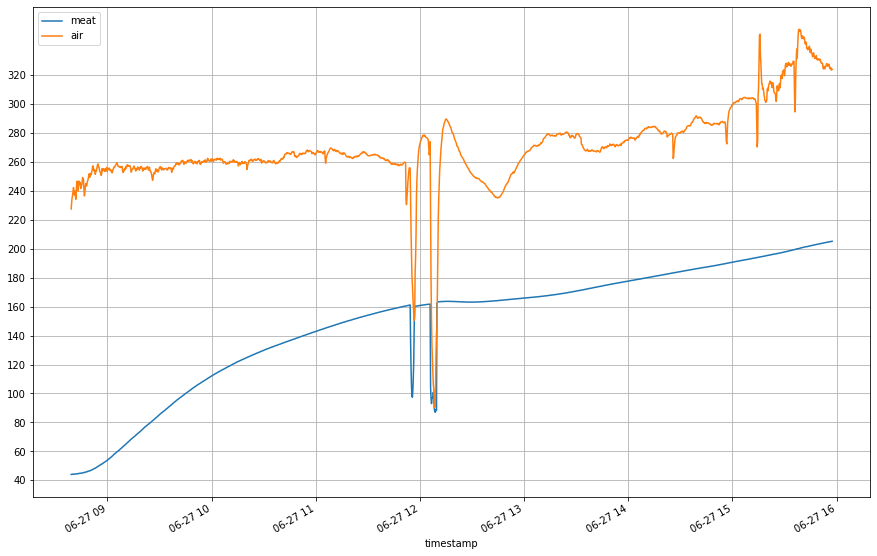

In [19]:
plotJSON('../data/pork_2_3lbs.txt')

2021-07-04 20:18:22-05:00
2021-07-05 12:20:00-05:00
0 days 16:01:38


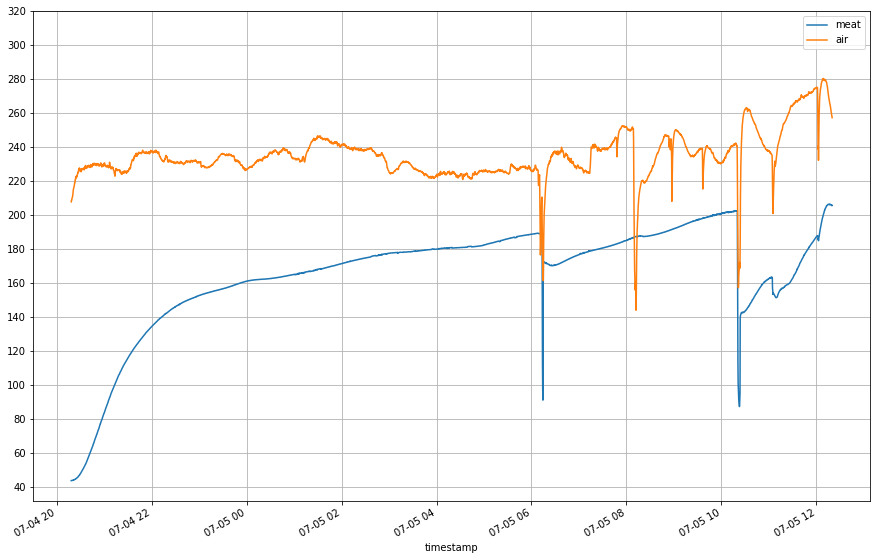

In [20]:
plotJSON('../data/brisket_17_split.txt')

2021-09-24 22:43:28-05:00
2021-09-25 12:46:34-05:00
0 days 14:03:06


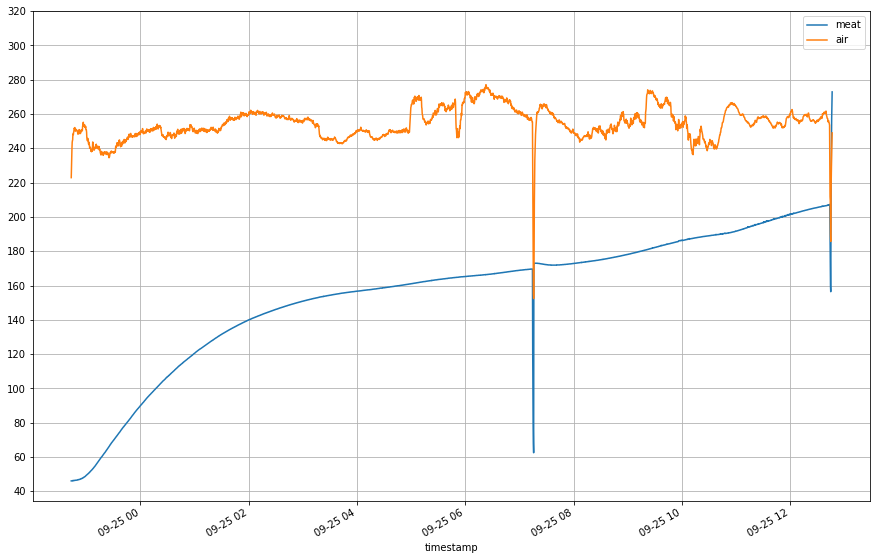

In [21]:
plotJSON('../data/boston_9_lb_2.txt')

2022-03-21 10:25:14-05:00
2022-03-21 16:50:56-05:00
0 days 06:25:42


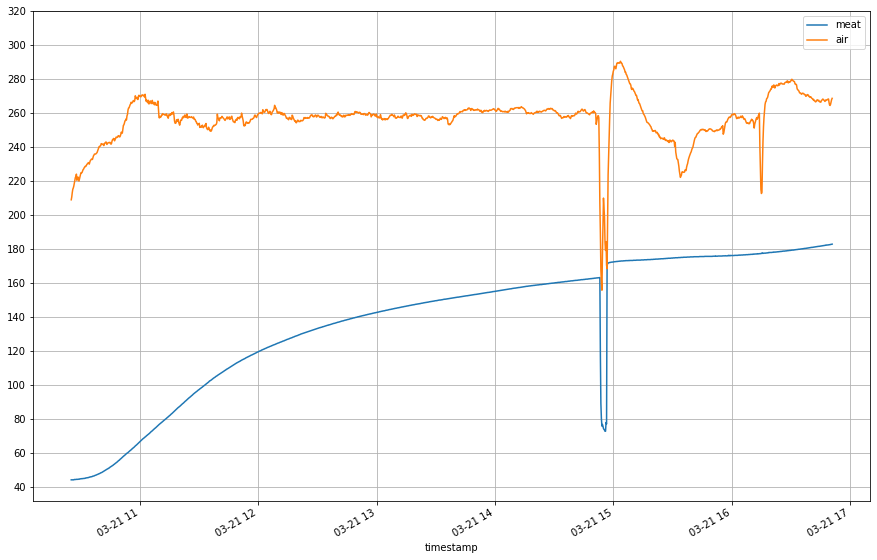

In [22]:
plotJSON('../data/pork_2_45lbs.txt')

2022-05-13 23:01:52-05:00
2022-05-14 15:22:37-05:00
0 days 16:20:45


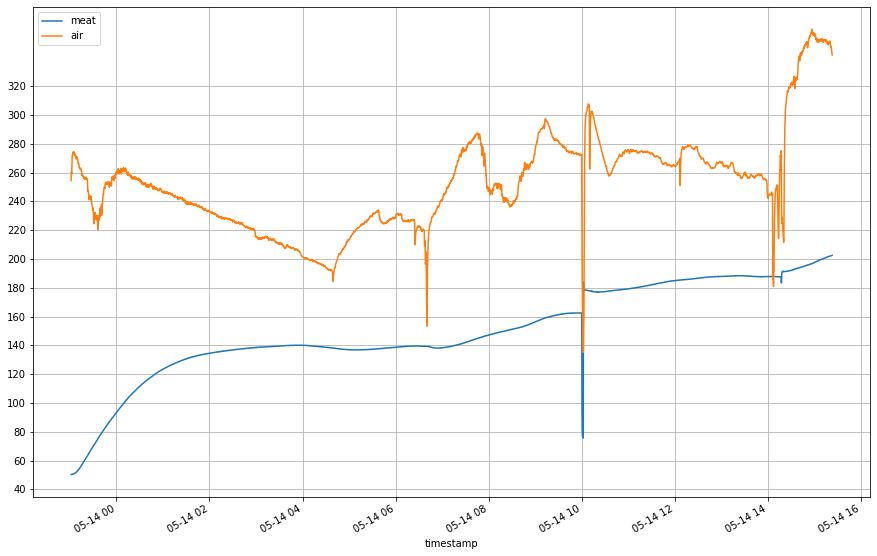

In [23]:
plotJSON('../data/brisket_12.txt')

2022-06-18 20:10:15-05:00
2022-06-19 15:53:01-05:00
0 days 19:42:46


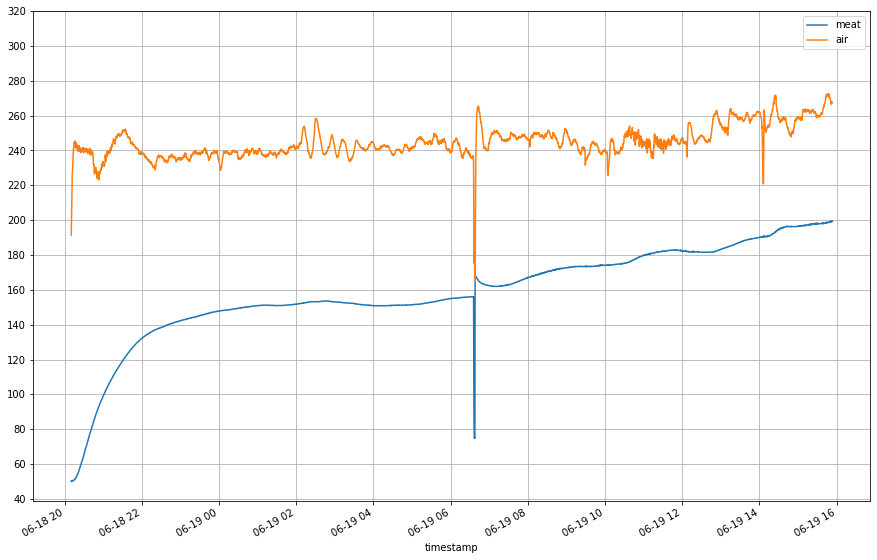

In [24]:
plotJSON('../data/brisket_12_2.txt')

2022-07-30 20:51:45-05:00
2022-07-31 11:03:14-05:00
0 days 14:11:29


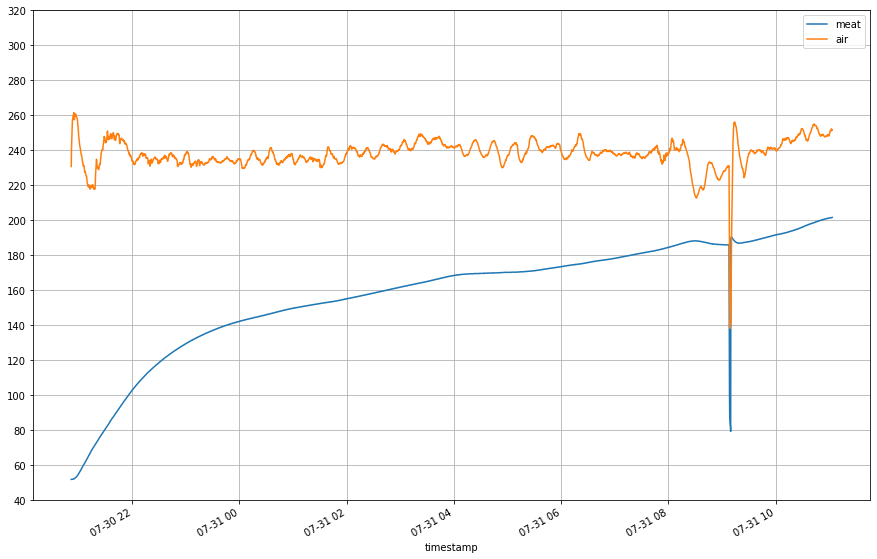

In [25]:
plotJSON('../data/boston_6_5lb.txt')

2022-09-04 20:24:36-05:00
2022-09-05 13:15:58-05:00
0 days 16:51:22


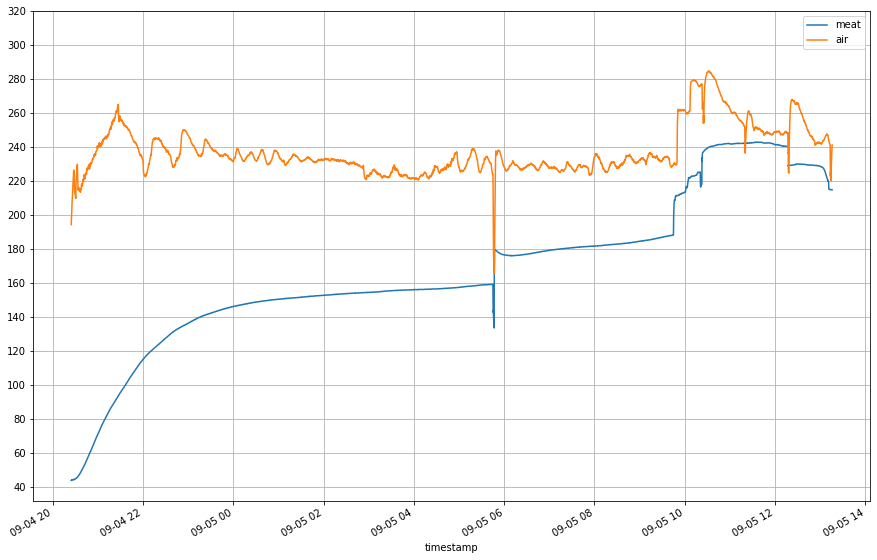

In [26]:
plotJSON('../data/brisket_15.txt')

2022-10-30 10:52:22-05:00
2022-10-30 16:23:39-05:00
0 days 05:31:17


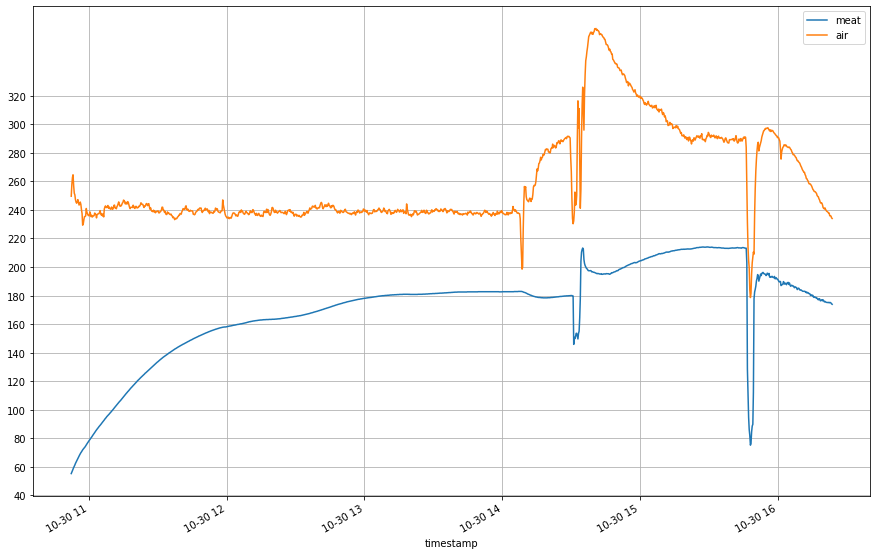

In [27]:
plotJSON('../data/bb_ribs3.txt')

2022-11-20 21:32:46-06:00
2022-11-21 11:30:55-06:00
0 days 13:58:09


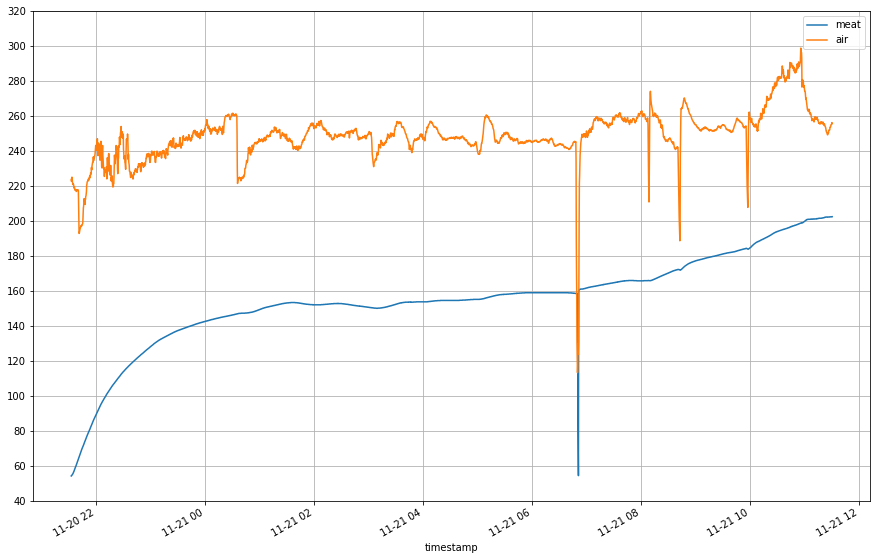

In [28]:
plotJSON('../data/porkSh2_7lbs.txt')

2023-05-28 20:21:34-05:00
2023-05-29 14:40:35-05:00
0 days 18:19:01


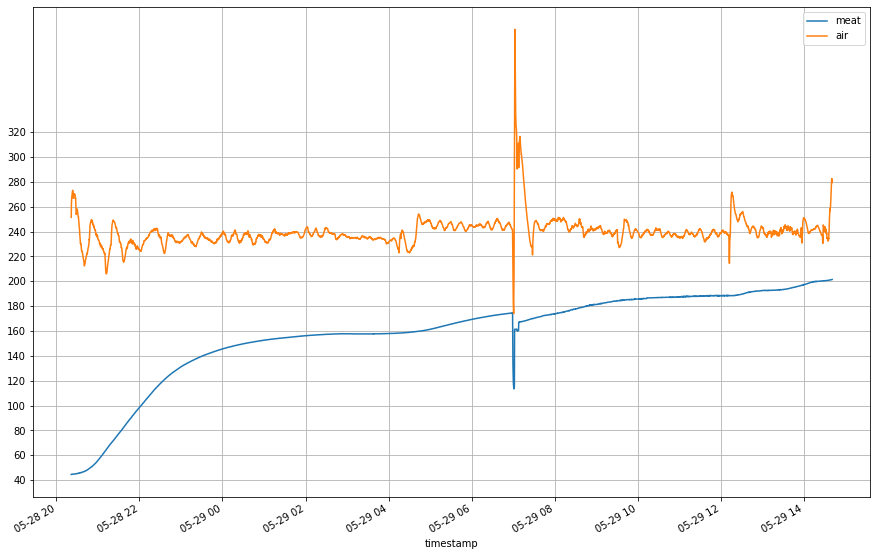

In [29]:
plotJSON('../data/brisket_15_2.txt')

2023-08-11 21:15:55-05:00
2023-08-12 12:27:03-05:00
0 days 15:11:08


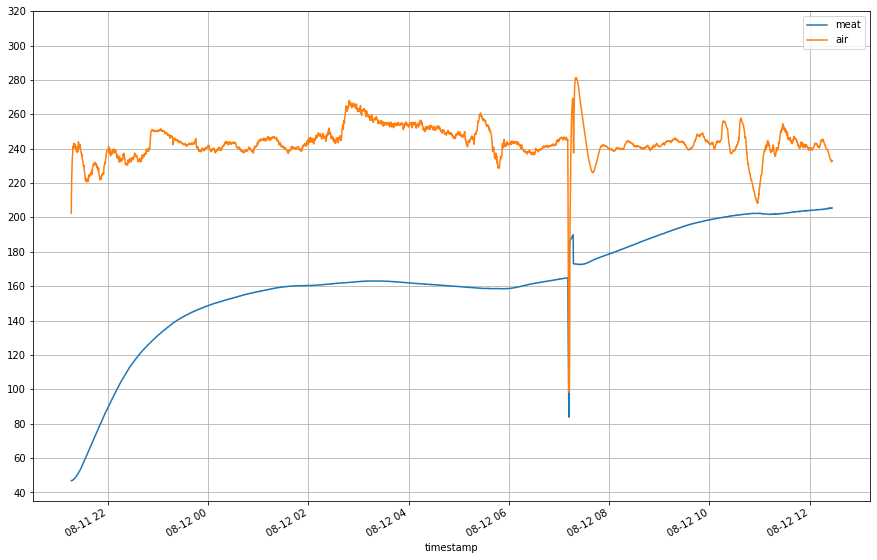

In [30]:
plotJSON('../data/brisket_12_3.txt')

2023-09-09 10:43:19-05:00
2023-09-09 13:16:39-05:00
0 days 02:33:20


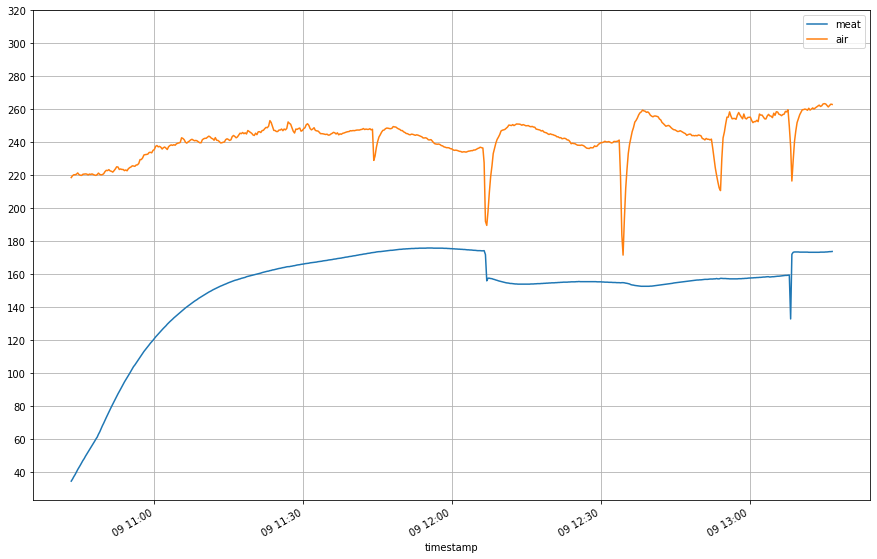

In [31]:
plotJSON('../data/chicken_3lb.txt')

2023-09-30 20:53:56-05:00
2023-10-01 11:59:03-05:00
0 days 15:05:07


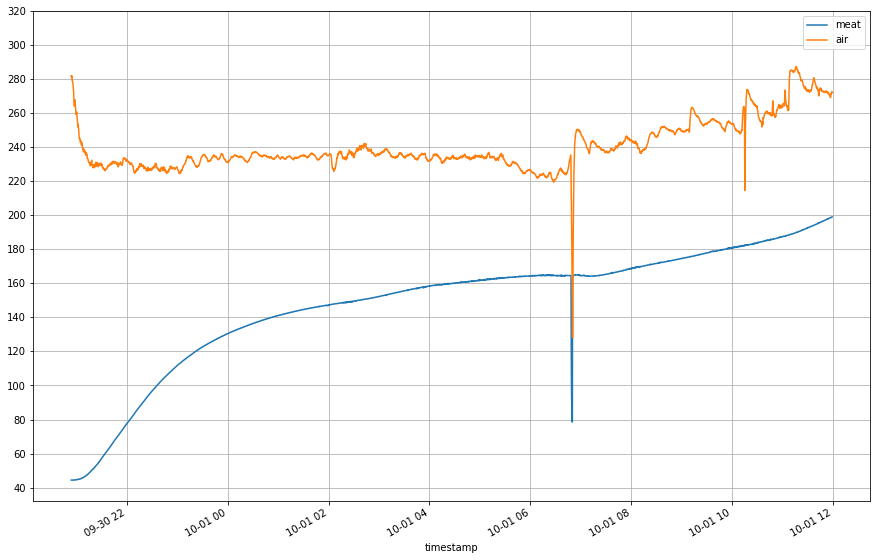

In [32]:
plotJSON('../data/boston_8lb_2.txt')

2024-05-18 21:56:12-05:00
2024-05-19 11:47:16-05:00
0 days 13:51:04


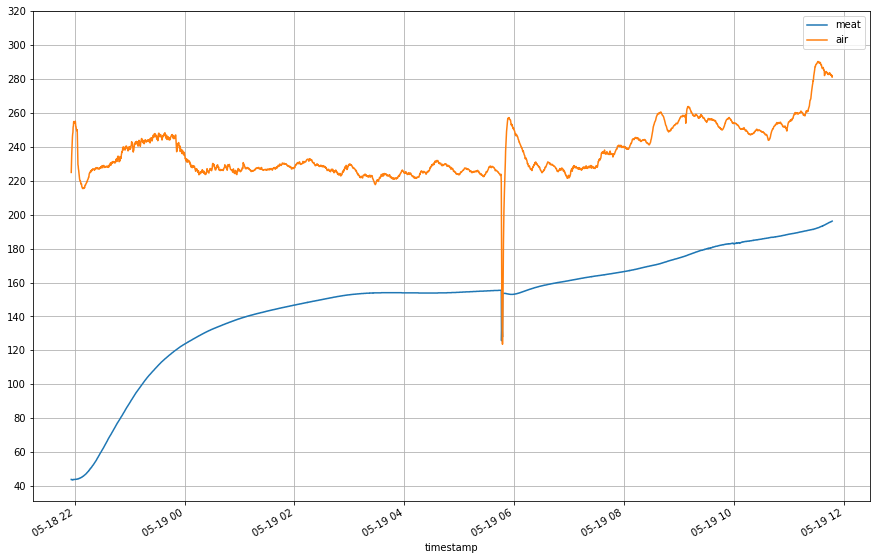

In [33]:
plotJSON('../data/boston_7_5lb_2.txt')

2024-05-26 20:00:10-05:00
2024-05-27 15:56:48-05:00
0 days 19:56:38


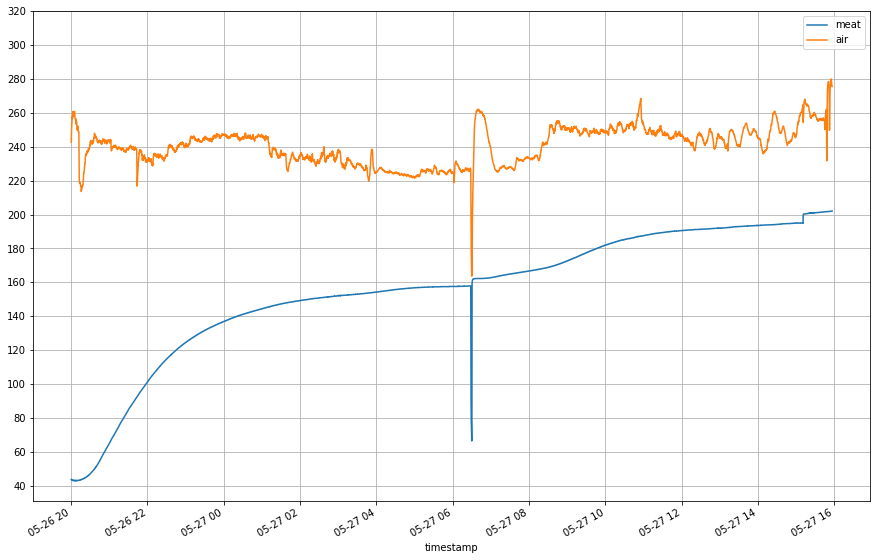

In [34]:
plotJSON('../data/brisket_15_3.txt')

2024-09-01 22:55:07-05:00
2024-09-02 14:05:13-05:00
0 days 15:10:06


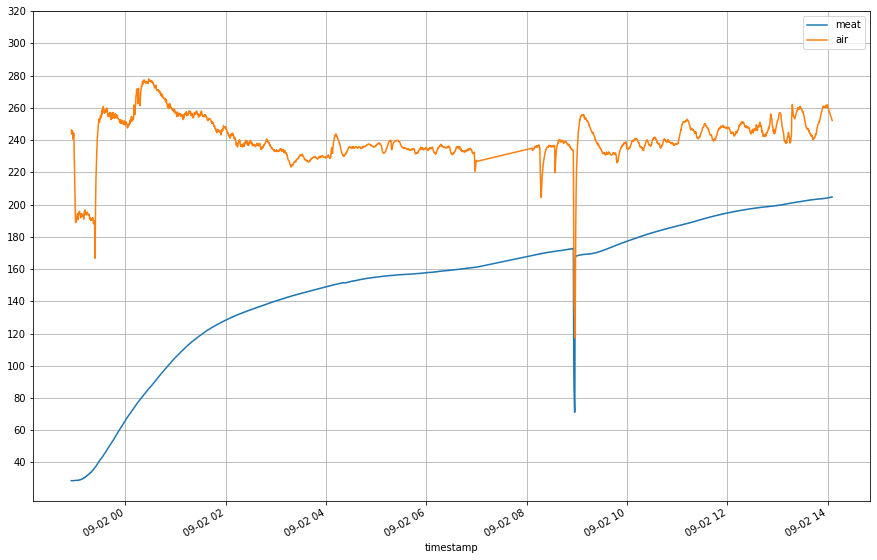

In [35]:
plotJSON('../data/boston_8lb_3.txt')

2024-09-28 14:31:46-05:00
2024-09-29 06:50:56-05:00
0 days 16:19:10


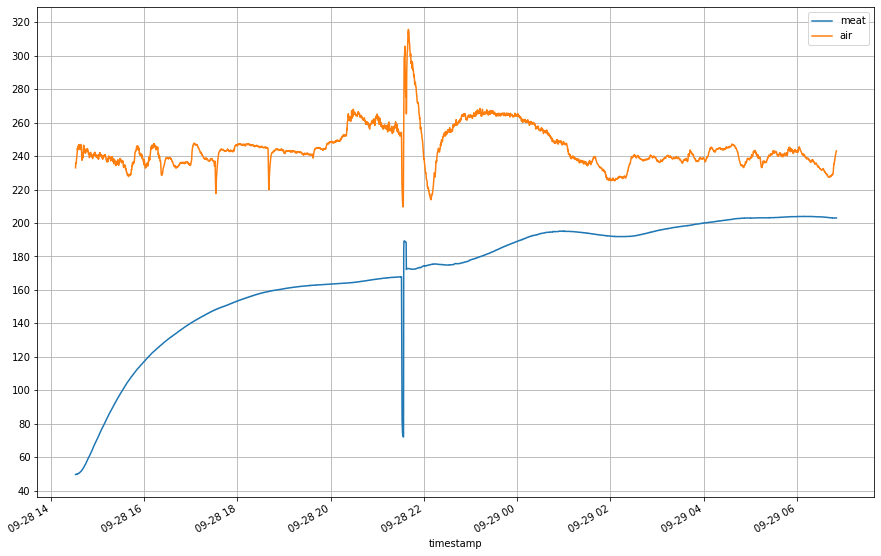

In [36]:
plotJSON('../data/brisket_14_2lb.txt')

2024-10-20 12:41:08-05:00
2024-10-20 17:21:55-05:00
0 days 04:40:47


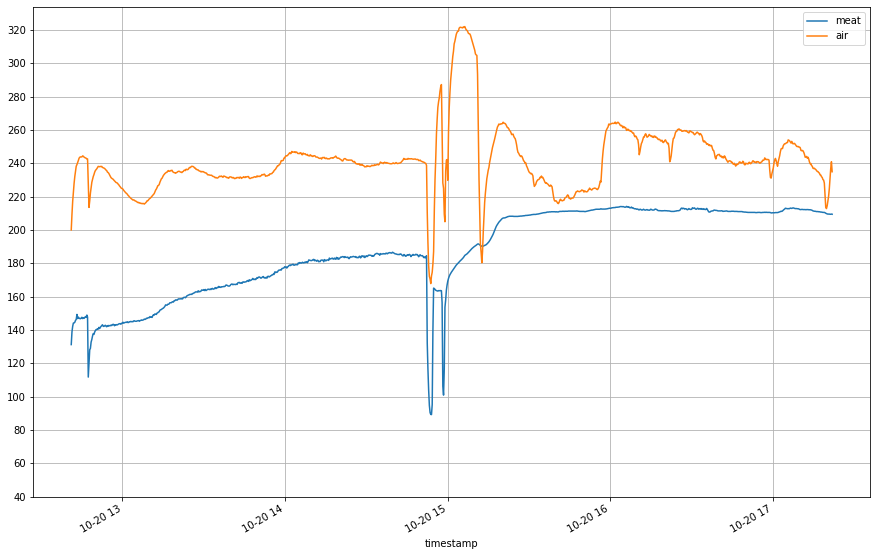

In [37]:
plotJSON('../data/bb_ribs3_2.txt')


2025-04-12 21:02:14-05:00
2025-04-13 13:01:47-05:00
0 days 15:59:33


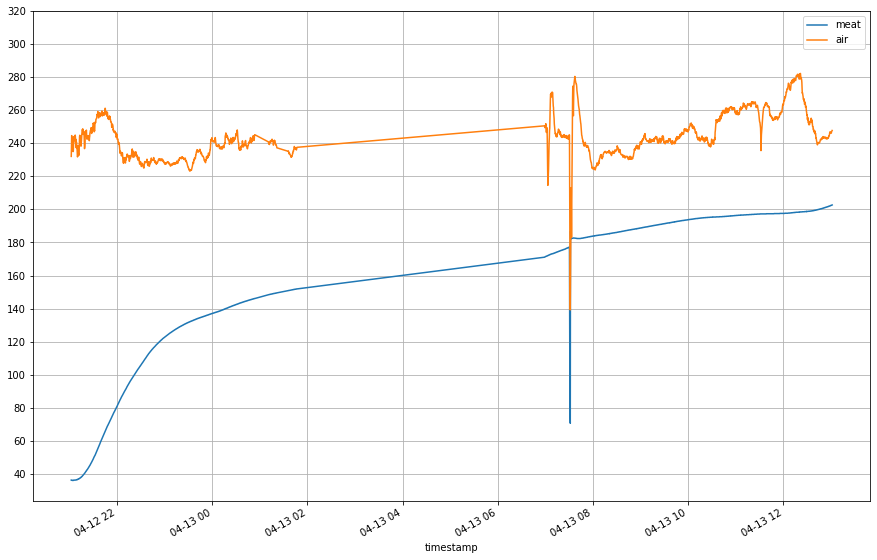

In [44]:
plotJSON('../data/brisket_10lb_3.txt')

2025-05-17 20:03:53-05:00
2025-05-18 11:59:31-05:00
0 days 15:55:38


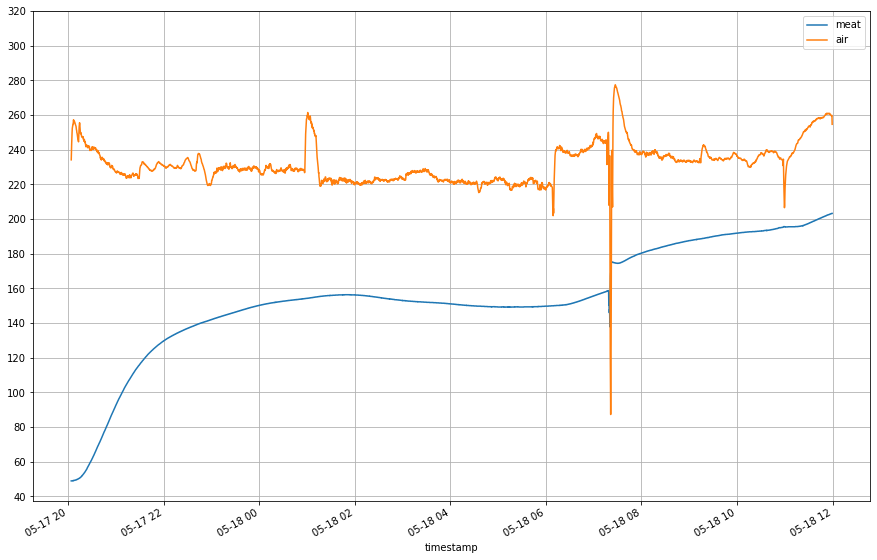

In [48]:
plotJSON('../data/boston_2_65lb.txt')